# Comparison of the lymph node datasets in InSituPy

This analysis follows the following tutorial:  
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
import pandas as pd
from insitupy.datasets import human_lymph_node_5k, human_lymph_node

In [4]:
x_1 = human_lymph_node()
x_2 = human_lymph_node_5k()

This dataset exists already. Download is skipped. To force download set `overwrite=True`.
For this dataset no image is available
This dataset exists already. Download is skipped. To force download set `overwrite=True`.
Image exists. Checking md5sum...
The md5sum matches. Download is skipped. To force download set `overwrite=True`.
Corresponding image data can be found in /Users/isabelgiray/.cache/InSituPy/demo_datasets/hlymphnode5k/unregistered_images.
For this dataset following image is available:
slide_id__hlymphnode5k__HE__histo.ome.tiff


In [5]:
x_1.load_cells()
x_2.load_cells()

Loading cells...
Loading cells...


/Users/isabelgiray/InSituPy/insitupy/_core/insitudata.py:743: UserWarning: Loading of binned expression did not work. Skipped it.
  warn("Loading of binned expression did not work. Skipped it.")


In [6]:
x_1.load_images()

Loading images...


In [7]:
x_2.load_images()

Loading images...


/var/folders/n3/_wp662b56svdfm7y3bsyc4bh0000gn/T/ipykernel_33537/606117857.py:1: UserWarning: Nuclei image type 'mip' not found. Used 'focus' instead. This is the normal behavior for data analyzed with Xenium Ranger >=v2.0
  x_2.load_images()
<tifffile.TiffFile 'morphology_focus_0000.ome.tif'> OME series cannot read multi-file pyramids
<tifffile.TiffFile 'morphology_focus_0001.ome.tif'> OME series cannot read multi-file pyramids
<tifffile.TiffFile 'morphology_focus_0002.ome.tif'> OME series cannot read multi-file pyramids
<tifffile.TiffFile 'morphology_focus_0003.ome.tif'> OME series cannot read multi-file pyramids


In [8]:
dataset_old = x_1.cells.matrix
dataset_5k = x_2.cells.matrix

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


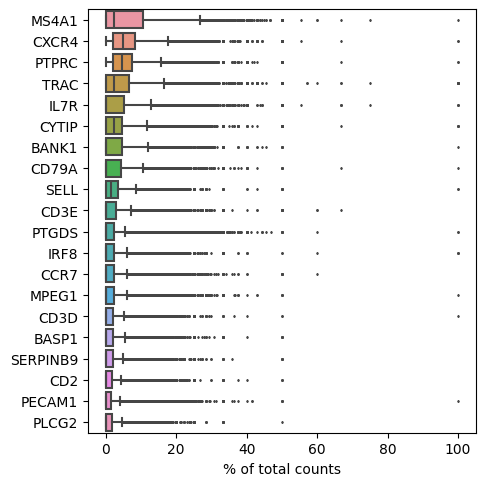

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


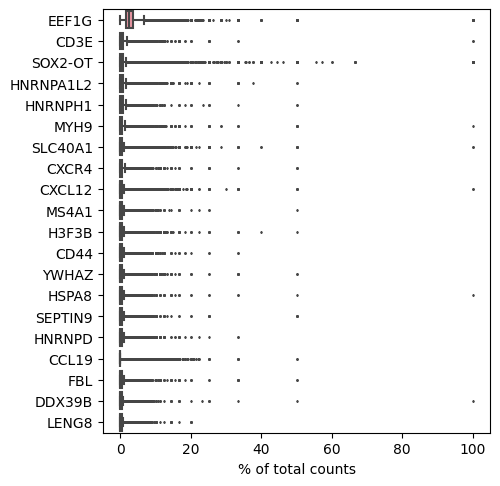

In [9]:
sc.pl.highest_expr_genes(dataset_old, n_top=20)
sc.pl.highest_expr_genes(dataset_5k, n_top=20)

In [10]:
sc.pp.calculate_qc_metrics(
    dataset_old, percent_top=None, log1p=False, inplace=True
)
sc.pp.calculate_qc_metrics(
    dataset_5k, percent_top=None, log1p=False, inplace=True
)

/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

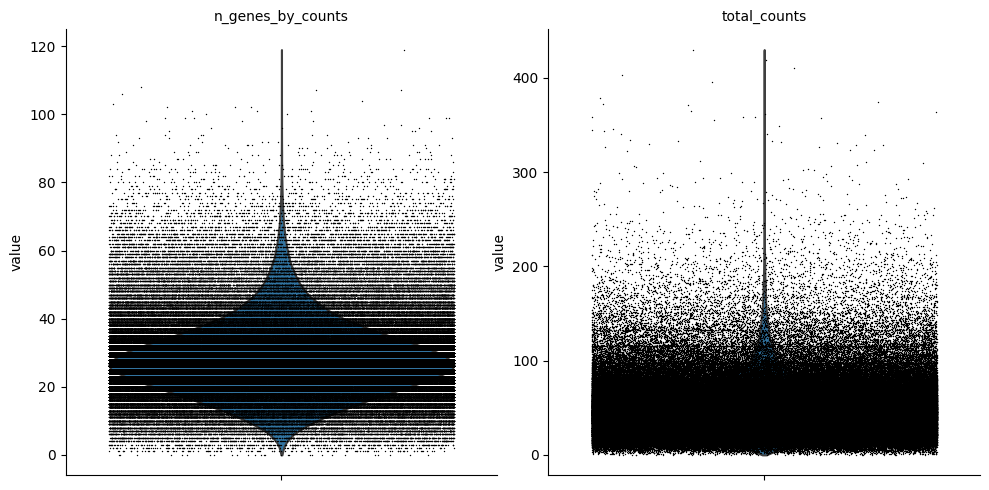

In [11]:
sc.pl.violin(
    dataset_old,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
    #stripplot=False,
)

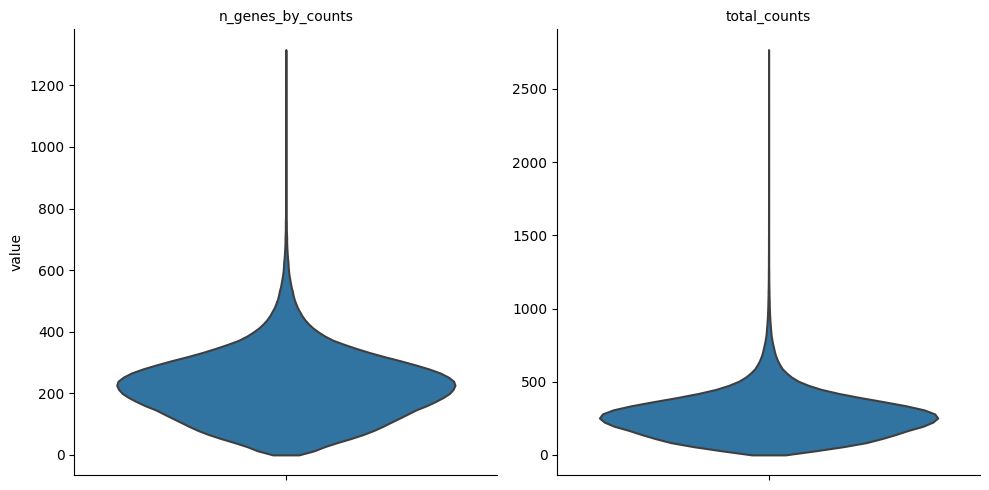

In [13]:
sc.pl.violin(
    dataset_5k,
    ["n_genes_by_counts", "total_counts"],
    jitter=0.4,
    multi_panel=True,
    stripplot=False,
)


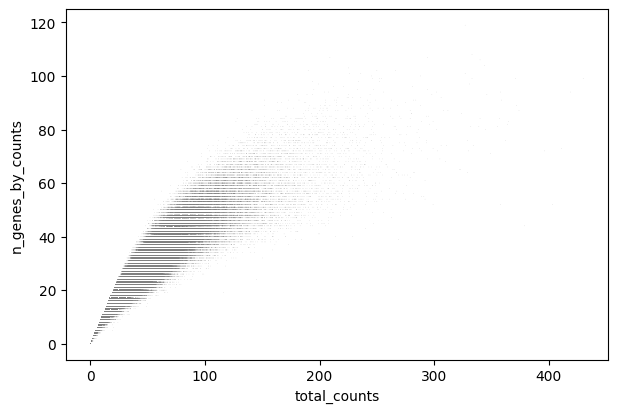

In [14]:
sc.pl.scatter(dataset_old, x="total_counts", y="n_genes_by_counts")

In [15]:
dataset_old = dataset_old[dataset_old.obs.total_counts > 0, :]
sc.pp.normalize_total(dataset_old, target_sum = 1e4)
sc.pp.log1p(dataset_old)
dataset_5k = dataset_5k[dataset_5k.obs.total_counts > 0, :]
sc.pp.normalize_total(dataset_5k, target_sum = 1e4)
sc.pp.log1p(dataset_5k)


/Users/isabelgiray/anaconda3/envs/insitupy/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
dataset_old.raw = dataset_old
dataset_5k.raw = dataset_5k

In [17]:
sc.pp.scale(dataset_old, max_value = 10)
sc.pp.scale(dataset_5k, max_value = 10)

In [18]:
len(dataset_5k.var_names)

4624

In [19]:
len(dataset_old.var_names)

377

Filter both datasets so that they only contain the same genes.

In [24]:
mask_1 = [elem in dataset_old.var_names for elem in dataset_5k.var_names]

In [20]:
mask_2 = [elem in dataset_5k.var_names for elem in dataset_old.var_names]

In [28]:
dataset_5k_filtered = dataset_5k[:, mask_1].copy()

In [29]:
dataset_old_filtered = dataset_old[:, mask_2].copy()

In [30]:
old_filtered_results_file = "/Users/isabelgiray/Desktop/TUM/Hiwi/Isabel_Hiwi/old_filtered_results.h5ad"
k_filtered_results_file = "/Users/isabelgiray/Desktop/TUM/Hiwi/Isabel_Hiwi/5k_filtered_results.h5ad"

In [31]:
dataset_old_filtered.write(old_filtered_results_file)
dataset_5k_filtered.write(k_filtered_results_file)